# CS4305TU - Assignment 2 - Regression

In this assignment, you will apply your newly obtained regression techniques with real-life data. **You should work in groups for this assignment.**

## Data source

What you will be playing with is aircraft trajectory data derived from [ADS-B](https://www.skybrary.aero/index.php/Automatic_Dependent_Surveillance_Broadcast_(ADS-B)). It is collected using the antenna from the top of the aerospace building:

<img src="https://pbs.twimg.com/media/EoBz7vVXEAAze48?format=jpg&name=medium" width="400"/>

Ensentially, ADS-B data is what you see on website like FlightRadar24:

<img src="https://media.giphy.com/media/cPutGcE0a9jdS/giphy.gif" width="400"/>

## Background

In the dataset, all flight trajectories include only the descent part of the flight. The dataset is split into two directories. One directory contains flights that are following the [Continous Descent Approach (CDA)](https://www.skybrary.aero/index.php/Continuous_Descent). The other directory contains flights that do not follow CDA. 

CDA is an operation, where the aircraft does not have any level flight segment during the descent. Follow the link above to know more.

<img src="https://1.bp.blogspot.com/-UFmjVcjmqCM/UIai54Y_wYI/AAAAAAAAAUM/tW1HTFP1IGI/s1600/image02_05_large.gif" width="400">


## Data attributes

The structures of all CSV files are the same. Here are descriptions of all columns:

- **time**: flight time in seconds, the first row starts at time 0.
- **icao**: aircraft transponder address, string format, unique for each aircraft.
- **type**: aircraft type code, string format.
- **callsign**: string format, often related to the flight number, unique for each flight.
- **latitude**: latitude coordinate in degrees.
- **longitude**: latitude coordinate  in degrees.
- **speed**: aircraft speed respective to ground, unit is in knots (1 knot = 0.51444 m/s).
- **track_angle**: direction of aircraft in relation to the true north, in degrees.
- **vertical_rate**: aircraft climb or descent speed in feet/minute (1 ft/min = 000508 m/s), negative value indicates aircraft is descending.

The most important features we are using are **time**, **altitude**, **speed**, and **vertical_rate**. 

## Instructions

The code in this notebook serves as the base for your assignment. The tasks are defined in each section.

You should implement the solutions using code cells and write your analysis using markdown cells.

Once you have complete everything, before submission, remember to restart the kernel and run all cells again. Make sure there are no errors. Then you should:

 - Save the notebook (**replace XX in the filename with your group number**)
 - Export a HTML version of the notebook. Hint: follow Mene -> File -> Download as -> HTML
 - Submit both the notebook (.ipynb) and the export (.html)


 ## References

- Quick tutorial for **Jupyter Notebook** : https://www.youtube.com/watch?v=2eCHD6f_phE

- Quick tutorial for **Jupyter Lab** (if you wish to use): https://www.youtube.com/watch?v=A5YyoCKxEOU
 

In [4]:
import glob
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

warnings.filterwarnings("ignore")

In [5]:
# loading all trajectory files

cda_files = sorted(glob.glob("data/cda/*.csv"))
noncda_files = sorted(glob.glob("data/noncda/*.csv"))




## Examples

Following two cells are some examples for data and plotting.

Remove these before submit your assignment.

In [6]:
df_example = pd.read_csv(cda_files[0])
df_example.head(10)

,time,icao,type,callsign,latitude,longitude,altitude,speed,track_angle,vertical_rate
0,0.0,40631F,A319,EZY58YF,52.79041,2.55135,24975,445,101,-192
1,20.0,40631F,A319,EZY58YF,52.78042,2.61632,24625,441,106,-1408
2,40.0,40631F,A319,EZY58YF,52.76827,2.68098,23925,436,107,-2304
3,60.0,40631F,A319,EZY58YF,52.75611,2.74282,23225,432,107,-1984
4,80.0,40631F,A319,EZY58YF,52.74248,2.81368,22550,425,107,-1728
5,100.0,40631F,A319,EZY58YF,52.73261,2.86673,22000,420,106,-2112
6,140.0,40631F,A319,EZY58YF,52.70906,2.99515,20550,411,106,-2112
7,160.0,40631F,A319,EZY58YF,52.69504,3.07138,19900,400,106,-1344
8,180.0,40631F,A319,EZY58YF,52.68875,3.10529,19550,397,106,-2304
9,200.0,40631F,A319,EZY58YF,52.67740,3.16626,18775,396,107,-1664


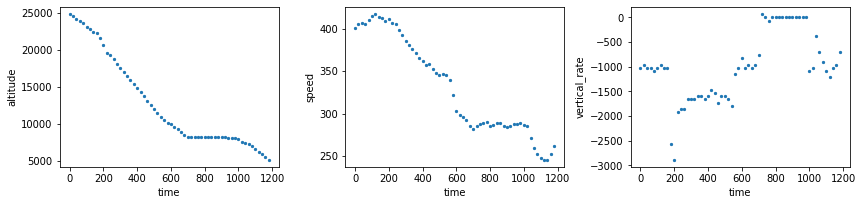

In [7]:
# visualization example

flight_sample = pd.read_csv(noncda_files[0])

fig, ax = plt.subplots(1, 3, figsize=(12, 3))
ax[0].scatter(flight_sample.time, flight_sample.altitude, s=5)
ax[0].set_xlabel("time")
ax[0].set_ylabel("altitude")
ax[1].scatter(flight_sample.time, flight_sample.speed, s=5)
ax[1].set_xlabel("time")
ax[1].set_ylabel("speed")
ax[2].scatter(flight_sample.time, flight_sample.vertical_rate, s=5)
ax[2].set_xlabel("time")
ax[2].set_ylabel("vertical_rate")
plt.tight_layout()
plt.show()

# Task 1: Simple linear regression 

In this task you will learn how to apply simple linear regression model using a couple of flight trajectories. To complete the task, follow the steps below:

1. Use you group id as random seed, select one flight from CDA trajectories, and another one from Non-CDA trajectories

1. Inspect the relationships of (time, altitude), (time, speed), and (time, vertical_rate) for these two trajectories.

1. Apply linear regression to all three parameters for both trajectories, using time as input and altitude as output.

1. Evaluate the performance of the estimators using different error metrics.

In [12]:
# set group_id to your own group number
group_id = 19

In [13]:
np.random.seed(group_id)

cda_filename = np.random.choice(cda_files)
noncda_filename = np.random.choice(noncda_files)

df_cda = pd.read_csv(cda_filename)
df_noncda = pd.read_csv(noncda_filename)

type_cda = df_cda["type"].iloc[0]
type_noncda = df_noncda["type"].iloc[0]

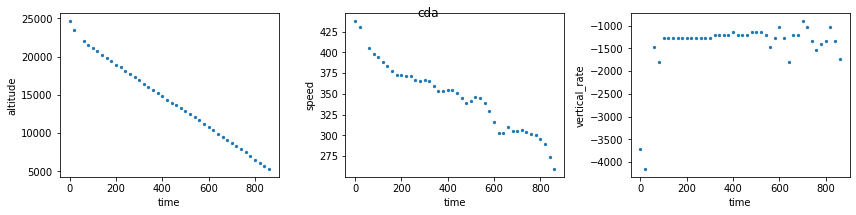

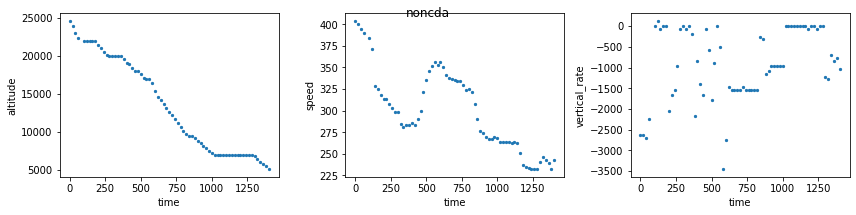

In [14]:
# cda
fig, ax = plt.subplots(1, 3, figsize=(12, 3))
ax[0].scatter(df_cda.time, df_cda.altitude, s=5)
ax[0].set_xlabel("time")
ax[0].set_ylabel("altitude")
ax[1].scatter(df_cda.time, df_cda.speed, s=5)
ax[1].set_xlabel("time")
ax[1].set_ylabel("speed")
ax[2].scatter(df_cda.time, df_cda.vertical_rate, s=5)
ax[2].set_xlabel("time")
ax[2].set_ylabel("vertical_rate")
plt.tight_layout()
fig.suptitle('cda')
plt.show()

# non-cda
fig, ax = plt.subplots(1, 3, figsize=(12, 3))
ax[0].scatter(df_noncda.time, df_noncda.altitude, s=5)
ax[0].set_xlabel("time")
ax[0].set_ylabel("altitude")
ax[1].scatter(df_noncda.time, df_noncda.speed, s=5)
ax[1].set_xlabel("time")
ax[1].set_ylabel("speed")
ax[2].scatter(df_noncda.time, df_noncda.vertical_rate, s=5)
ax[2].set_xlabel("time")
ax[2].set_ylabel("vertical_rate")
plt.tight_layout()
fig.suptitle('noncda')
plt.show()




# Using Scikit-Learn to perform simple linear regression

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error,median_absolute_error
#cda
x_train, x_test, y_train, y_test = train_test_split(df_cda.time.to_numpy(), df_cda.altitude.to_numpy())


lr = LinearRegression().fit(x_train.reshape(-1, 1), y_train)
MSE = mean_squared_error(y_test, lr.predict(x_test.reshape(-1,1)))
R2 = r2_score(y_test, lr.predict(x_test.reshape(-1,1)))
MeanAE = mean_absolute_error(y_test, lr.predict(x_test.reshape(-1,1)))
MedianAE = median_absolute_error(y_test, lr.predict(x_test.reshape(-1,1)))


print("Cda time with cda altitude:")
print("intercept:", lr.intercept_.round(2))
print("slope:", lr.coef_[0].round(2))
print('MSE : ', MSE)
print('RMSE : ', np.sqrt(MSE))
print('R2 score:', R2)
print('MeanAE:' , MAE)
print('MedianAE:', MedianAE)

#noncda
x_train, x_test, y_train, y_test = train_test_split(df_noncda.time.to_numpy(),  df_noncda.altitude.to_numpy())

lr = LinearRegression().fit(x_train.reshape(-1, 1), y_train)
MSE = mean_squared_error(y_test, lr.predict(x_test.reshape(-1,1)))
R2 = r2_score(y_test, lr.predict(x_test.reshape(-1,1)))
MeanAE = mean_absolute_error(y_test, lr.predict(x_test.reshape(-1,1)))
MedianAE = median_absolute_error(y_test, lr.predict(x_test.reshape(-1,1)))

print("")
print("Noncda time with noncda altitude:")
print("intercept:", lr.intercept_.round(2))
print("slope:", lr.coef_[0].round(2))
print('MSE : ', MSE)
print('RMSE : ', np.sqrt(MSE))
print('R2 score:', R2)
print('MeanAE:' , MAE)
print('MedianAE:', MedianAE)


Cda time with cda altitude:
intercept: 23393.09
slope: -21.04
MSE :  45899.449894105455
RMSE :  214.24156901522508
R2 score: 0.998541598050455
MeanAE: 97.724188053259
MedianAE: 180.19598711668004

Noncda time with noncda altitude:
intercept: 24037.86
slope: -14.76
MSE :  1448656.8504169693
RMSE :  1203.6016161575096
R2 score: 0.9519087540545509
MeanAE: 97.724188053259
MedianAE: 769.1757467817515


# Do it manually 

In [47]:
def mse(x, y, b0, b1):
    n = len(x)
    return 1 / n * np.sum((y - (b0 + b1 * x)) ** 2)


def rmse(x, y, b0, b1):
    n = len(x)
    return np.sqrt(1 / n * np.sum((y - (b0 + b1 * x)) ** 2))

def mean_ae(x, y, b0, b1):
    return np.mean(np.abs(y - (b0 + b1 * x)))

def median_ae(x, y, b0, b1):
    return np.median(np.abs(y - (b0 + b1 * x)))

def r2(x, y, b0, b1):
    var_regression = np.mean(np.sum((y - (b0 + b1 * x)) ** 2))
    var_data = np.mean(np.sum((y - y.mean()) ** 2))
    r2 = 1 - var_regression / var_data
    return r2

In [50]:
# CDA
# time and altitude
x_train, x_test, y_train, y_test = train_test_split(df_cda.time.to_numpy(), df_cda.altitude.to_numpy())

n = len(x_train)
sum_y = np.sum(y_train)
sum_x = np.sum(x_train)
sum_xy = np.sum(x_train * y_train)
sum_x2 = np.sum(x_train ** 2)

b1_hat = (sum_xy - sum_x * sum_y / n) / (sum_x2 - sum_x ** 2 / n)
b0_hat = sum_y / n - b1_hat * sum_x / n

print("Cda time with cda altitude:")
print("intercept:", b0_hat)
print("slope:", b1_hat)

MSE = mse(x_test, y_test, b0_hat, b1_hat)
RMSE = rmse(x_test, y_test, b0_hat, b1_hat)
R2 = r2(x_test, y_test, b0_hat, b1_hat)
MeanAE = mean_ae(x_test, y_test, b0_hat, b1_hat)
MedianAE = median_ae(x_test, y_test, b0_hat, b1_hat)

print("MSE = {} ".format(MSE.round(2)))
print("RMSE = {} ".format(RMSE.round(2)))
print('R2 score:', R2)
print('MeanAE:' , MAE)
print('MedianAE:', MedianAE)

# nonCDA
# time and altitude
x_train, x_test, y_train, y_test = train_test_split(df_noncda.time.to_numpy(), df_noncda.altitude.to_numpy())

n = len(x_train)
sum_y = np.sum(y_train)
sum_x = np.sum(x_train)
sum_xy = np.sum(x_train * y_train)
sum_x2 = np.sum(x_train ** 2)

b1_hat = (sum_xy - sum_x * sum_y / n) / (sum_x2 - sum_x ** 2 / n)
b0_hat = sum_y / n - b1_hat * sum_x / n
print("")
print("Noncda time with cda altitude:")
print("intercept:", b0_hat)
print("slope:", b1_hat)

MSE = mse(x_test, y_test, b0_hat, b1_hat)
RMSE = rmse(x_test, y_test, b0_hat, b1_hat)
R2 = r2(x_test, y_test, b0_hat, b1_hat)
MeanAE = mean_ae(x_test, y_test, b0_hat, b1_hat)
MedianAE = median_ae(x_test, y_test, b0_hat, b1_hat)

print("MSE = {} ".format(MSE.round(2)))
print("RMSE = {} ".format(RMSE.round(2)))
print('R2 score:', R2)
print('MeanAE:' , MAE)
print('MedianAE:', MedianAE)



Cda time with cda altitude:
intercept: 23401.840329044506
slope: -21.090894024768733
MSE = 17724.87 
RMSE = 133.13 
R2 score: 0.9991489559941888
MeanAE: 97.724188053259
MedianAE: 121.8469581462632

Noncda time with cda altitude:
intercept: 23793.9926593376
slope: -14.538899422488171
MSE = 1085145.9 
RMSE = 1041.7 
R2 score: 0.9706735625846817
MeanAE: 97.724188053259
MedianAE: 725.3479421792381


For CDA:
- one can see clearly that the decrease is almost a constant slope of time versus altitude;
- The decrease in speed is gradual;
- The vertical rate s negative and almost constant, despite from the end.

For non-CDA:
- The decrease in time versus altitude is gradual and leveled;
- The decrease in speed versus time looks sinusoidal (damped oscillation);
- The vertical rate is always negative and fluctating very much.


Analysing the metrics:
- One can obtain that the linear regression of the cda is peformed over the whole better (lower MSE, RMSE, MeanAE and MedianAE and a R2 score closer to one);
- Besides that calculating the linear regression manually is done more accurate, this can be seen by looking at the metrics ( slightly lower MSE, RMSE, MeanAE and MedianAE and a R2 score closer to one), also the intercept and the slope has more decimals which could increase the accuracy.




# Task 2: Multiple linear regression

In this task you will learn how to apply Polynomial regression model. To complete the task, follow the steps below:

1. Using the same trajectories from the previous task, but choose both speed and altitude as predictors for the vertical rate. 

1. Construct a 3D multiple linear regression model

1. Visualize your result and briefly analyze your results.

In [52]:
# %matplotlib widget
%matplotlib inline

In [53]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.pyplot import cm
from mpl_toolkits.mplot3d import Axes3D

CDA: Coefficients are intercept: 12533.695195324162 , slope altitude: 0.32632451717081606 , slope speed: -53.52021932920273


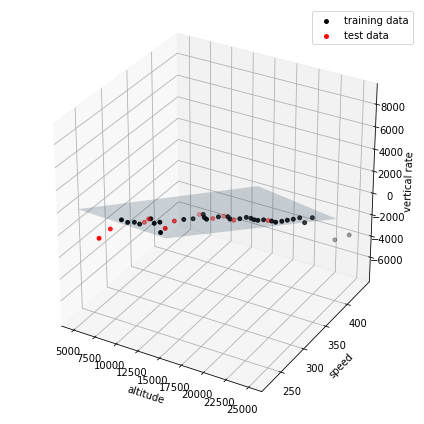

In [59]:
# for cda
# creating the predictors altitude and speed
x1 = df_cda.altitude.to_numpy()
x2 = df_cda.speed.to_numpy()

# make one vector
x = np.concatenate((x1.reshape(-1,1),x2.reshape(-1,1)), axis = 1)

# vertical rate as predictor
y = df_cda.vertical_rate.to_numpy()

x_train, x_test, y_train, y_test = train_test_split(x, y)

model = LinearRegression().fit(x_train, y_train)
b0 = model.intercept_
b1, b2 = model.coef_

print('CDA: Coefficients are intercept: {} , slope altitude: {} , slope speed: {}'.format(b0,b1,b2))

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(x_train[:,0], x_train[:,1], y_train, color = 'k', s = 15, label = 'training data')
ax.scatter(x_test[:,0], x_test[:,1], y_test, color = 'r', s = 15, label = 'test data')
ax.set_xlabel('altitude')
ax.set_ylabel('speed')
ax.set_zlabel('vertical rate')
ax.legend()

x1, x2 = np.meshgrid(range(5000, 25000), range(225, 400))
z = b0 + b1*x1 + b2*x2

ax.plot_surface(x1, x2, z, alpha = 0.2)
plt.tight_layout()

Noncda: Coefficients are intercept: 2447.099569313053 , slope altitude: 0.008939191699786813 , slope speed: -11.78231046383563


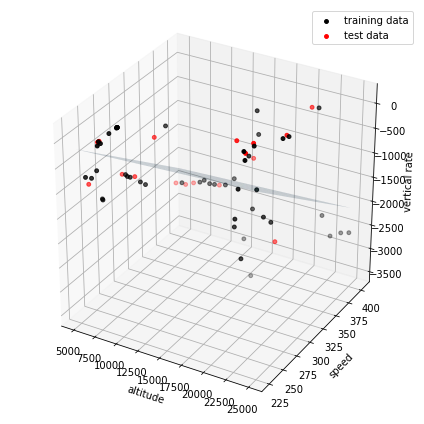

In [64]:
# for noncda
# creating the predictors altitude and speed
x1 = df_noncda.altitude.to_numpy()
x2 = df_noncda.speed.to_numpy()

# make one vector
x = np.concatenate((x1.reshape(-1,1),x2.reshape(-1,1)), axis = 1)

# vertical rate as predictor
y = df_noncda.vertical_rate.to_numpy()

x_train, x_test, y_train, y_test = train_test_split(x, y)

model = LinearRegression().fit(x_train, y_train)
b0 = model.intercept_
b1, b2 = model.coef_

print('Noncda: Coefficients are intercept: {} , slope altitude: {} , slope speed: {}'.format(b0,b1,b2))

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(x_train[:,0], x_train[:,1], y_train, color = 'k', s = 15, label = 'training data')
ax.scatter(x_test[:,0], x_test[:,1], y_test, color = 'r', s = 15, label = 'test data')
ax.set_xlabel('altitude')
ax.set_ylabel('speed')
ax.set_zlabel('vertical rate')
ax.legend()

x1, x2 = np.meshgrid(range(5000, 25000), range(225, 400))
z = b0 + b1*x1 + b2*x2

ax.plot_surface(x1, x2, z, alpha = 0.2)
plt.tight_layout()

In [65]:
def plotdata(ax):
    ax.scatter(
        X_train[:, 0], X_train[:, 1], y_train, color="k", s=15, label="training data"
    )

    ax.scatter(
        X_test[:, 0], X_test[:, 1], y_test, color="r", s=25, label="testing data"
    )

    ax.set_xlabel("Fueslage length (m)")
    ax.set_ylabel("Fueslage width (m)")
    ax.set_zlabel("Wing area ($m^2$)")
    ax.legend()

For aswell the CDA as the non CDA the following holds:
- The decrease of the vertical rate versus the altitude is flattening;
- The decrease of the vertical rate versus the speed is increasing;
- The change of the vertical rate versus the altitude is much smaller than the change of the vertical rate versus the speed.

However there is some difference:
- The decrease of the vertical rate versus the altitude of the non-cda is almost constant;
- The decrease of the vertical rate versus the speed of the non-cda is much smaller.


# Task 3: Polynomial regression

In this task you will learn how to apply Polynomial regression model. To complete the task, follow the steps below:

1. Based on previous trajectories, apply polynomial regression, using altitude as input and speed as output. 

1. Try out different orders of polynomials.

1. Analyze your choice briefly. Taking into consideration of bias-variance trade-off.

1. Applying regularization to a high-order polynomial model you have tried earlier. Write a brief analysis of your result.


In [ ]:
# write your code here

# create more cells if needed




(this is a markdown cell)

write your analysis here






# Task 4: Logistic regression

In this task you will learn how to apply Logistic regression model. You need to generate a new dataset based on given data. To complete the task, follow the steps below:

1. For all trajectories in CDA and NON-CDA group, apply linear regression, using time as input and altitude as output.

1. Calculate MAE for all regression models. Construct a dataset with MAE as input, and CDA status as output (CDA as 0, and NON-CDA as 1).

1. Determine the Logistic regression model describe the relationship between MAE and CDA status

In [ ]:
# write your code here

# create more cells if needed


def calcMAE(df):
    # complete this function for calculating MAE

    # [TODO] fit linear model to time and altitude

    # [TODO] calculate MAE

    return MAE


new_data = []

for f in cda_files:
    df = pd.read_csv(f)
    MAE = calcMAE(df)
    new_data.append((MAE, 0))

for f in noncda_files:
    df = pd.read_csv(f)

    MAE = calcMAE(df)
    new_data.append((MAE, 1))

In [ ]:
# write your logistic regression code here

(this is a markdown cell)

write your analysis here






# Task 5: Bayesian regression

In this task you will learn how to apply Bayesian regression model. I recommend to use of `pymc3` library. To complete the task, follow the steps below:

1. Apply Bayesian linear regression to vertical speed of CDA and Non-CDA trajectories (time as input). Provide an analysis of your result.

1. **(Bonus)** Design a quadratic model to altitude using the Bayesian regression approach. Visualize and analyze your findings.



In [ ]:
# write your code here

# create more cells if needed

# Tip: try different prior probability density functions of parameters. If the regression fails:
#   1. change the initial guess.
#   2. change the variance for the priors of the random variables


(this is a markdown cell)

write your analysis here




